# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 590
['waitangi', 'adamstown', 'yellowknife', 'uwajima', 'blackmans bay', 'wuxi', 'illizi', 'fabens', 'vanimo', 'port-aux-francais', 'anadyr', 'udachny', 'praia da vitoria', 'bethel', 'thompson', 'vila velha', 'cannonvale', 'tari', 'as sulayyil', 'longyearbyen', 'qaqortoq', 'papatowai', 'georgetown', 'tiksi', 'mrakovo', 'buta', 'ndele', 'ixtapa', "ust'-kulom", 'taroa', 'pisco', 'mogadishu', 'ushuaia', 'mezhdurechenskiy', 'karratha', 'grytviken', 'bilibino', 'taiohae', 'jamestown', 'hawaiian paradise park', 'utrik', 'quzhou', 'gretna', 'port elizabeth', 'yuxi', 'hamilton', 'alofi', 'iqaluit', 'tirumullaivasal', 'west island', 'port mathurin', 'cabo san lucas', 'badger', 'priozersk', "muzayri'", 'fuvahmulah', 'inhambane', 'puerto natales', 'la passe', 'klyuchi', 'ust-nera', 'dwarka', 'naze', 'jiquipilas', 'christchurch', 'laojunmiao', 'avarua', 'nagqu', 'dunedin', 'coxim', 'gueltat zemmour', 'iskateley', 'uturoa', 'kavaratti', 'chibougamau', 'savanna-la-mar',

In [50]:
url_g = "http://api.openweathermap.org/geo/1.0/direct?"
url_w = "https://api.openweathermap.org/data/2.5/weather?"

geo_url = url_g + "q=" + city + "&appid=" + weather_api_key
weather_url = url_w + "q=" + city + "&appid=" + weather_api_key

weather=requests.get(city_url).json()
print(weather)
print(weather['dt'])

city_weather = weather['weather'][0]['description']

# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = weather['coord']['lat']
city_lng = weather['coord']['lon']
city_max_temp = weather['main']['temp_max']
city_humidity = weather['main']['humidity']
city_clouds = weather['clouds']['all']
city_wind = weather['wind']['speed']
city_country = weather['sys']['country']
city_date = datetime.datetime.utcfromtimestamp(weather['dt'])

print(city_date)

{'coord': {'lon': -176.5597, 'lat': -43.9535}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285.83, 'feels_like': 285.22, 'temp_min': 284.72, 'temp_max': 285.83, 'pressure': 1015, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 325, 'gust': 3.13}, 'clouds': {'all': 100}, 'dt': 1697172353, 'sys': {'type': 2, 'id': 2040615, 'country': 'NZ', 'sunrise': 1697216225, 'sunset': 1697263650}, 'timezone': 49500, 'id': 4032804, 'name': 'Waitangi', 'cod': 200}
1697172353
2023-10-13 04:45:53


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [60]:
# Set the API base URL
url_w = "https://api.openweathermap.org/data/2.5/weather?"
url_g = "http://api.openweathermap.org/geo/1.0/direct?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    geo_url = url_g + "q=" + city + "&appid=" + weather_api_key
    weather_url = url_w + "q=" + city + "&appid=" + weather_api_key

    weather=requests.get(weather_url).json()
    geo=requests.get(geo_url).json()
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather['coord']['lat']
        city_lng = weather['coord']['lon']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_clouds = weather['clouds']['all']
        city_wind = weather['wind']['speed']
        city_country = weather['sys']['country']
        city_date = datetime.datetime.utcfromtimestamp(weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | uwajima
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | wuxi
Processing Record 7 of Set 1 | illizi
Processing Record 8 of Set 1 | fabens
Processing Record 9 of Set 1 | vanimo
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | cannonvale
Processing Record 18 of Set 1 | tari
Processing Record 19 of Set 1 | as sulayyil
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | papatowai
Processing Record 23 of Set 1

In [61]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [62]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,284.72,81,100,2.24,NZ,2023-10-13 05:22:44
1,adamstown,-25.0660,-130.1015,294.14,68,93,4.74,PN,2023-10-13 05:22:45
2,yellowknife,62.4560,-114.3525,280.60,100,100,3.09,CA,2023-10-13 05:22:46
3,uwajima,33.2238,132.5600,295.33,58,50,2.38,JP,2023-10-13 05:22:46
4,blackmans bay,-43.0167,147.3167,288.22,54,82,1.34,AU,2023-10-13 05:22:47


In [63]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [64]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,284.72,81,100,2.24,NZ,2023-10-13 05:22:44
1,adamstown,-25.0660,-130.1015,294.14,68,93,4.74,PN,2023-10-13 05:22:45
2,yellowknife,62.4560,-114.3525,280.60,100,100,3.09,CA,2023-10-13 05:22:46
3,uwajima,33.2238,132.5600,295.33,58,50,2.38,JP,2023-10-13 05:22:46
4,blackmans bay,-43.0167,147.3167,288.22,54,82,1.34,AU,2023-10-13 05:22:47


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

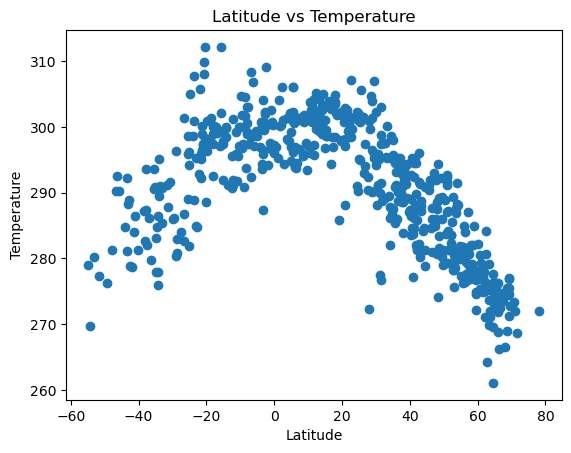

In [70]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Latitude vs Temperature')
ax.set_xlabel('Latitude')
ax.set_ylabel('Temperature')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

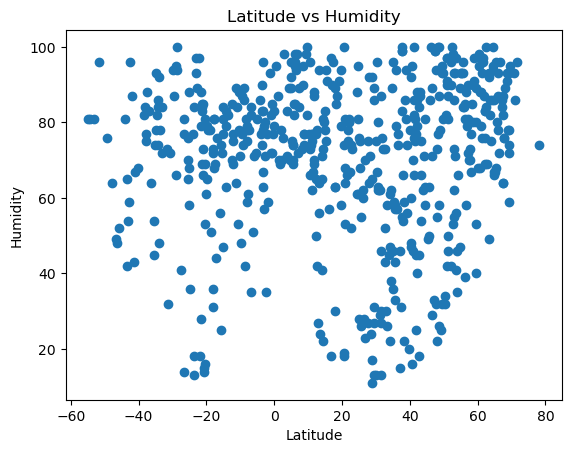

In [71]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Latitude vs Humidity')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

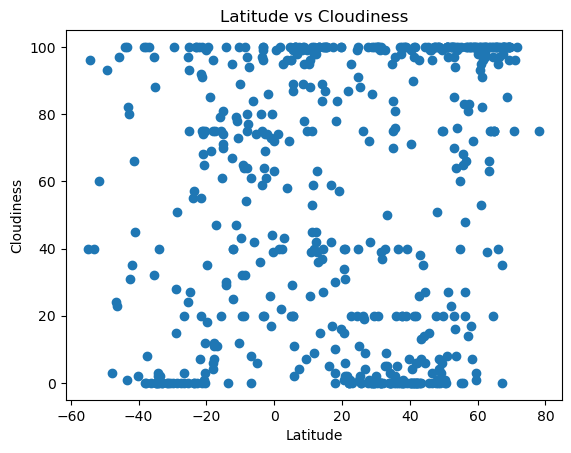

In [72]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Latitude vs Cloudiness')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

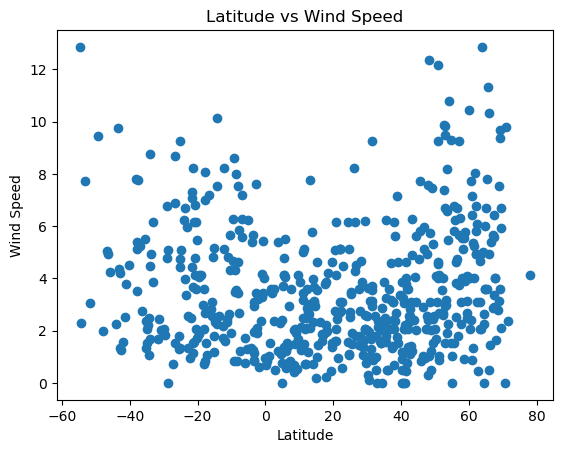

In [73]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Latitude vs Wind Speed')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [108]:
# Define a function to create Linear Regression plots
def linearRegression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    regress_info = [regress_values, rvalue, equation]
    return regress_info

In [74]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,280.60,100,100,3.09,CA,2023-10-13 05:22:46
3,uwajima,33.2238,132.5600,295.33,58,50,2.38,JP,2023-10-13 05:22:46
5,wuxi,31.5689,120.2886,291.45,87,100,3.54,CN,2023-10-13 05:22:48
6,illizi,26.4833,8.4667,293.04,28,19,4.30,DZ,2023-10-13 05:22:48
7,fabens,31.5023,-106.1586,298.77,46,0,9.26,US,2023-10-13 05:22:49


In [75]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,284.72,81,100,2.24,NZ,2023-10-13 05:22:44
1,adamstown,-25.0660,-130.1015,294.14,68,93,4.74,PN,2023-10-13 05:22:45
4,blackmans bay,-43.0167,147.3167,288.22,54,82,1.34,AU,2023-10-13 05:22:47
8,vanimo,-2.6741,141.3028,302.04,80,74,3.43,PG,2023-10-13 05:22:50
9,port-aux-francais,-49.3500,70.2167,276.19,76,93,9.45,TF,2023-10-13 05:22:51


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8733917791663768


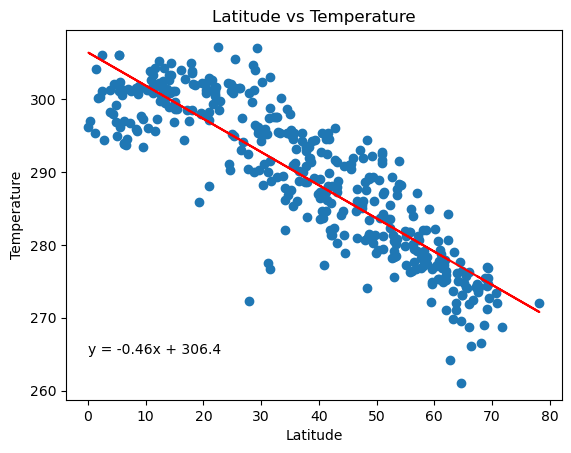

In [109]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,linearRegression(x,y)[0],"r-")
ax.set_title('Latitude vs Temperature')
ax.set_xlabel('Latitude')
ax.set_ylabel('Temperature')
ax.text(0,265,linearRegression(x,y)[2])
print(f"The r value is {linearRegression(x,y)[1]}")
plt.show()

The r value is 0.6952476728257585


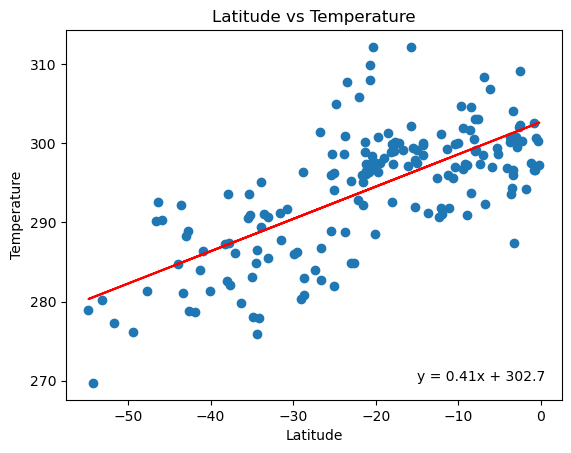

In [113]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,linearRegression(x,y)[0],"r-")
ax.set_title('Latitude vs Temperature')
ax.set_xlabel('Latitude')
ax.set_ylabel('Temperature')
ax.text(-15,270,linearRegression(x,y)[2])
print(f"The r value is {linearRegression(x,y)[1]}")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere has a negative relationship with temperature and latitude. The souther hemisphere has a positive relationship with temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.0911668780291137


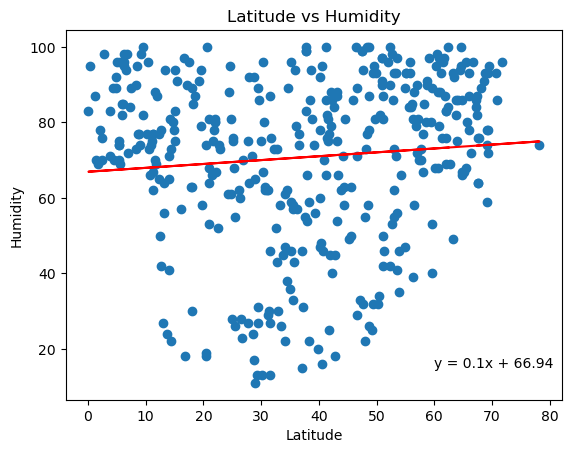

In [116]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,linearRegression(x,y)[0],"r-")
ax.set_title('Latitude vs Humidity')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity')
ax.text(60,15,linearRegression(x,y)[2])
print(f"The r value is {linearRegression(x,y)[1]}")
plt.show()

The r value is 0.03836383052649215


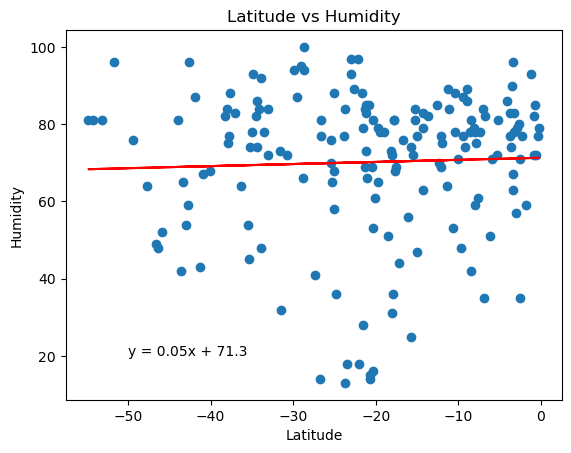

In [117]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,linearRegression(x,y)[0],"r-")
ax.set_title('Latitude vs Humidity')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity')
ax.text(-50,20,linearRegression(x,y)[2])
print(f"The r value is {linearRegression(x,y)[1]}")
plt.show()

**Discussion about the linear relationship:** There is no relationship between humidity and latitude for either the northern or southern hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.15848799543310677


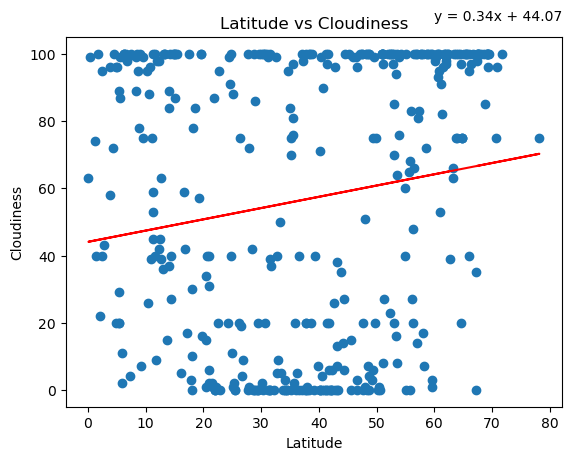

In [120]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,linearRegression(x,y)[0],"r-")
ax.set_title('Latitude vs Cloudiness')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness')
ax.text(60,110,linearRegression(x,y)[2])
print(f"The r value is {linearRegression(x,y)[1]}")
plt.show()

The r value is 0.19604092445986449


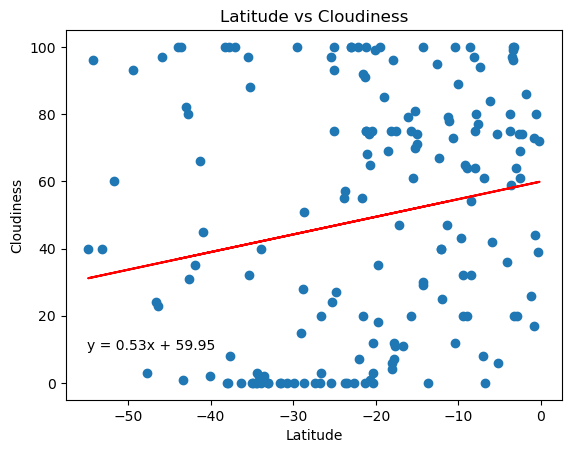

In [121]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,linearRegression(x,y)[0],"r-")
ax.set_title('Latitude vs Cloudiness')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness')
ax.text(-55,10,linearRegression(x,y)[2])
print(f"The r value is {linearRegression(x,y)[1]}")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere appears to get more cloudy as you go more north. The souther hemispher gets more cloudy as you get close to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.3558536355083522


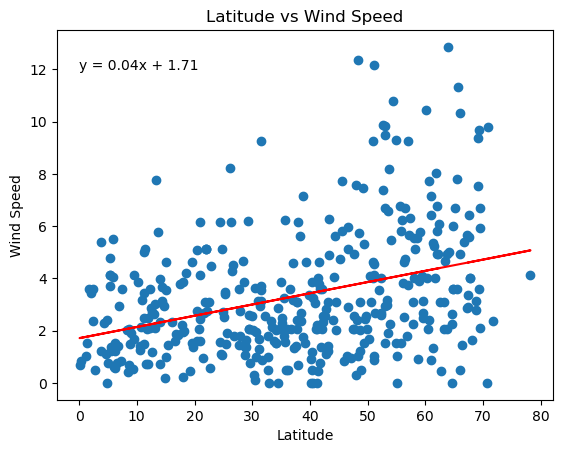

In [122]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,linearRegression(x,y)[0],"r-")
ax.set_title('Latitude vs Wind Speed')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed')
ax.text(0,12,linearRegression(x,y)[2])
print(f"The r value is {linearRegression(x,y)[1]}")
plt.show()

The r value is -0.151626271303029


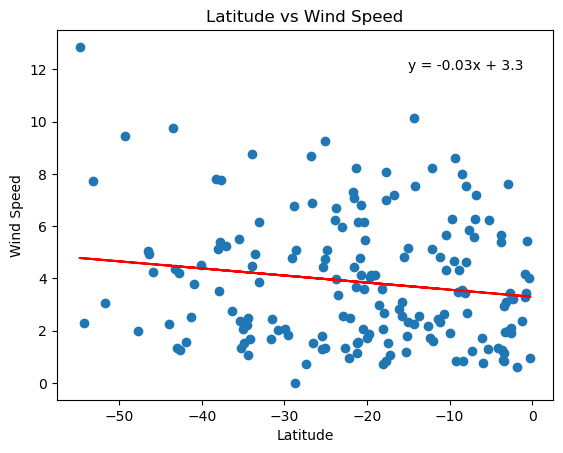

In [125]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,linearRegression(x,y)[0],"r-")
ax.set_title('Latitude vs Wind Speed')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed')
ax.text(-15,12,linearRegression(x,y)[2])
print(f"The r value is {linearRegression(x,y)[1]}")
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemispheres get windier as you move awawy from the equator and closer to the poles.